# Propagating uncertainties in fluid inclusion barometry
- This notebook shows how to propagate uncertainty when performing fluid inclusion barometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\cosmicray_filter.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


'0.0.50'

### Load in the data

In [2]:
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.436888,1048.898738,0.897797
1,FI2,0.417796,1015.924767,0.831850
2,FI4,0.459045,1041.589916,0.883180
3,FI5,0.493865,1034.935183,0.869870
4,FI7,0.482227,1034.820102,0.869640


## Propagating uncertainty in temperature
- Lets say the uncertainty in temperature is +-50K. So this is an absolute error, and we want temperature distributed normally
- We want to use a single step profile initially to convert pressure to depth
- We want to make 1000 duplicates per FI with temperature varying by 1 sigma=50K
- It outputs MC_Av, which is the average for each fluid inclusion, and MC_All, which contains rows for each of the N duplicates you asked for appended end-on-end

### Lets do a silly example first just using a single FI so you can see what its doing
- If you use plot_figure=True, it will plot the resulting distributions. 

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.567547,1.568251,0.071870,5.918175,5.920834,0.271341,50,0,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.425236,1.426147,0.065452,5.380888,5.384329,0.247109,50,0,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.676498,1.676897,0.074049,6.329513,6.331020,0.279566,50,0,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.869947,1.872109,0.085139,7.059869,7.068031,0.321438,50,0,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.803458,1.804739,0.077204,6.808842,6.813678,0.291481,50,0,0.0,1307.970102,0.482227,None,2700,SW96


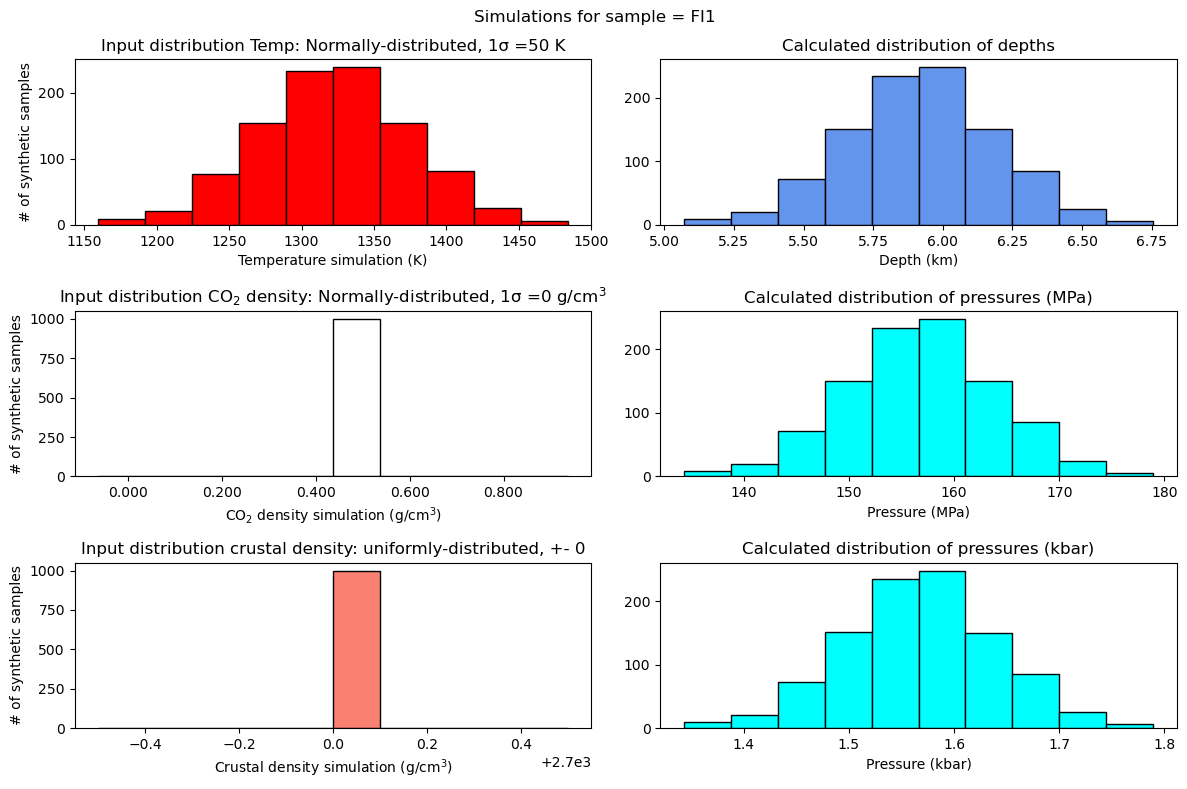

In [3]:
MC_Av_Tonly, MC_All_Tonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_Tonly.head()

### Plot each FI and its 1 sigma error
-  Lets plot the pressure of the inputted FI (SingleFI_P_kbar), and then the standard deviation of the MC simulation against the Fo content

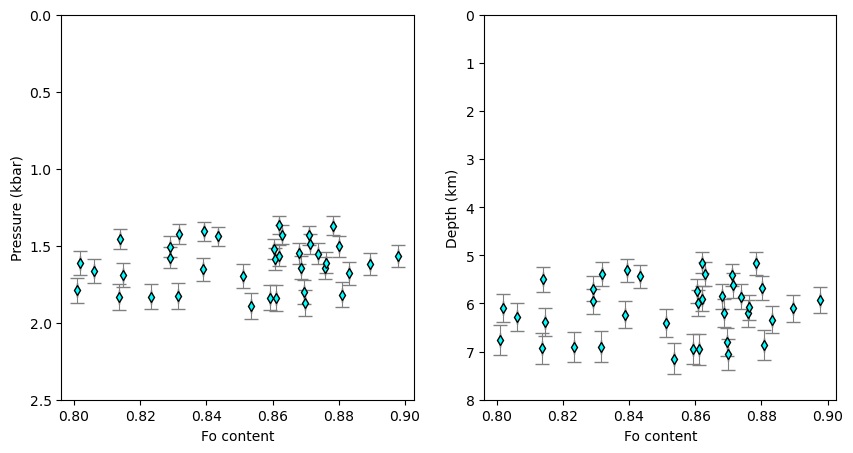

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()

## Propagating uncertainty in CO$_2$ Density
- Lets say the uncertainty in CO$_2$ density is +-10%, in reality, this will vary greatly between instruments, as well with the absolute density (e.g. more like +-20% for the very weakest diads, more like +-5% for the densest).

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.574766,1.565274,0.234639,5.945430,5.909595,0.885863,0,10,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.426163,1.410986,0.210494,5.384388,5.327087,0.794709,0,10,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.691212,1.663856,0.265823,6.385066,6.281782,1.003596,0,10,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.898304,1.896662,0.299656,7.166927,7.160729,1.131331,0,10,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.817359,1.806071,0.285781,6.861325,6.818707,1.078949,0,10,0.0,1307.970102,0.482227,None,2700,SW96


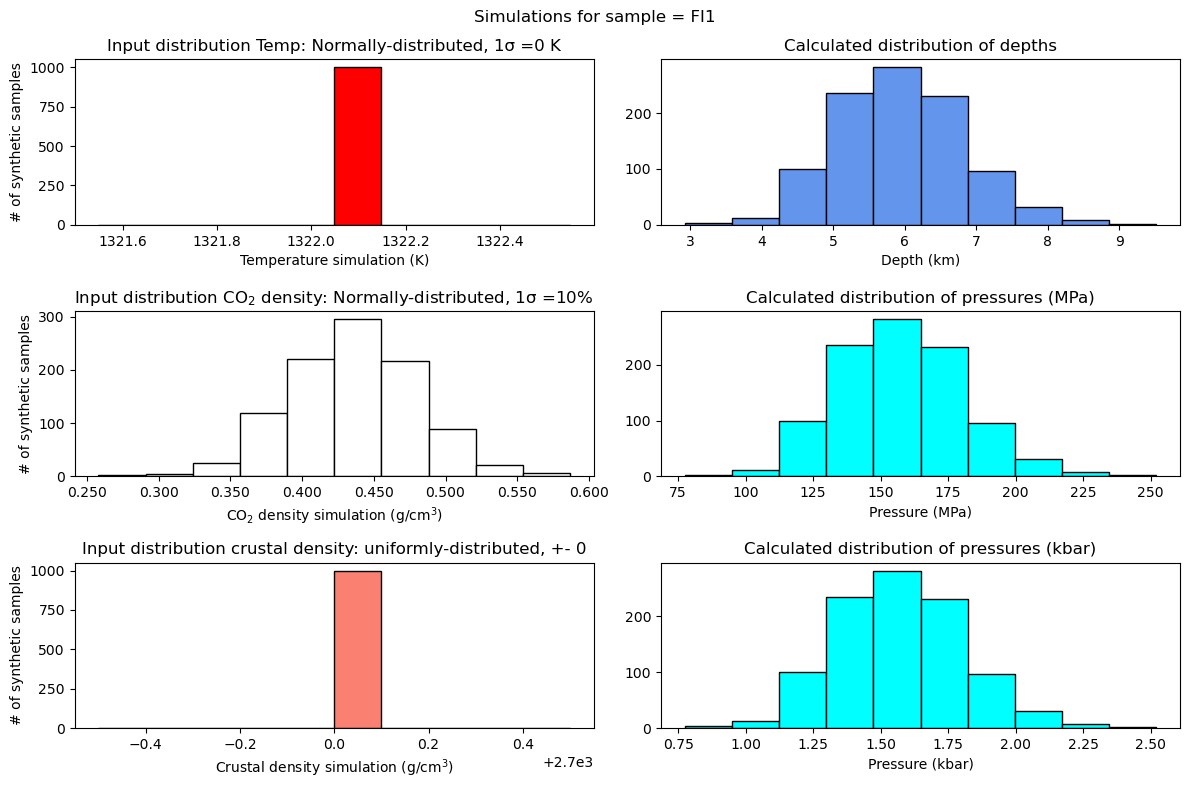

In [6]:
MC_Av_rhoonly, MC_All_rhoonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=10, error_type_CO2_dens='Perc', error_dist_CO2_dens='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rhoonly.head()

## Simulation varying both temperature and CO$_2$ density
- Lets say you think you have +-30K uncertainty in temp, and +-0.02 g/cm3 in density

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.565956,1.567572,0.113898,5.912167,5.918271,0.430014,30,0.02,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.427846,1.427504,0.109241,5.390744,5.389452,0.412432,30,0.02,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.678512,1.676423,0.121284,6.337115,6.329231,0.457901,30,0.02,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.873972,1.872134,0.133809,7.075062,7.068125,0.505188,30,0.02,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.797954,1.801241,0.124310,6.788061,6.800473,0.469324,30,0.02,0.0,1307.970102,0.482227,None,2700,SW96


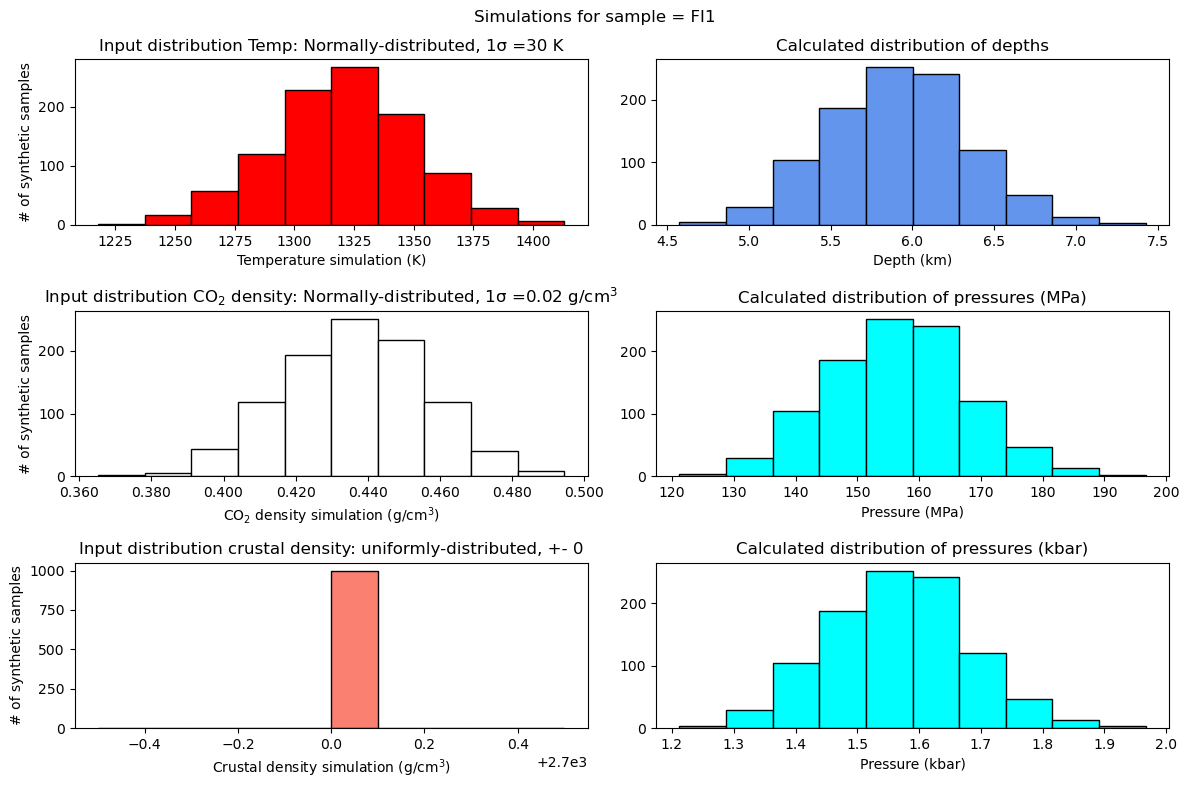

In [8]:
MC_Av_rho_T, MC_All_rho_T, fig=pf.propagate_FI_uncertainty(
T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
crust_dens_kgm3=2700,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rho_T.head()

## Uncertainty in Temp, CO$_2$ and Crustal density
- Here we also add a 5% uncertainty in crustal density.

working on sample number 0
working on sample number 20


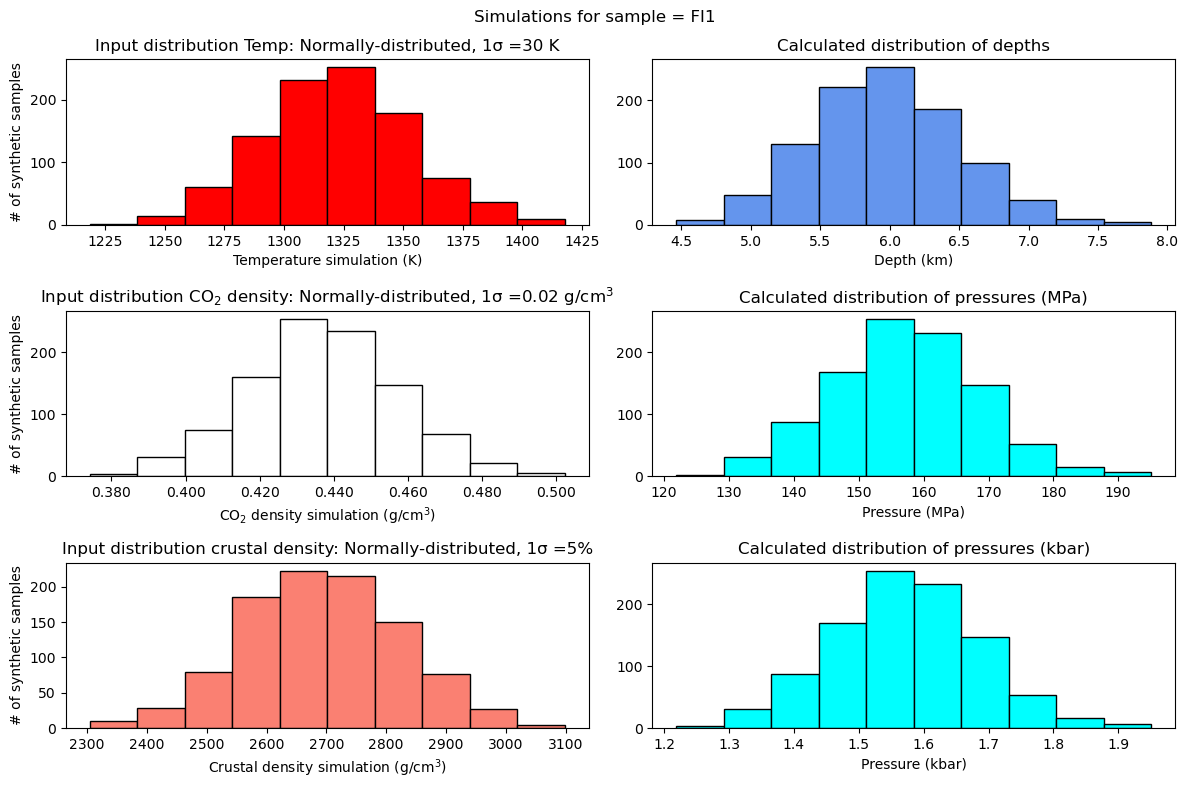

In [9]:
MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CD.head()

fig.savefig('MonteCarlo_Sample1_png', dpi=300)

In [10]:
MC_All_rho_T_CD.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,FI1,1.446581,144.658129,5.716028,2579.761099,None,1326.167089,0.412552
1,FI1,1.582967,158.296678,6.193515,2605.347119,None,1340.178581,0.435034
2,FI1,1.630839,163.083870,6.165304,2696.419580,None,1331.729241,0.445959
3,FI1,1.425961,142.596122,5.393109,2695.252885,None,1344.236063,0.404079
4,FI1,1.294829,129.482941,4.995205,2642.349149,None,1271.423049,0.395142


In [11]:
MC_Av_rho_T_CD

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.573010,1.569640,0.114979,5.967325,5.954891,0.528856,30,0.02,135.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.429961,1.425679,0.110696,5.433014,5.397241,0.515137,30,0.02,135.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.685043,1.682642,0.121304,6.379887,6.338601,0.566906,30,0.02,135.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.875745,1.872413,0.132253,7.106706,7.078583,0.615152,30,0.02,135.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.797345,1.795214,0.126182,6.802779,6.782513,0.588384,30,0.02,135.0,1307.970102,0.482227,None,2700,SW96
5,FI9,0.490442,6.954312,1.841989,1.849765,1.842584,0.128393,7.001340,6.967865,0.592453,30,0.02,135.0,1303.661132,0.490442,None,2700,SW96
6,FI11,0.453781,6.207481,1.644175,1.645085,1.639913,0.117083,6.226515,6.216626,0.533800,30,0.02,135.0,1311.100560,0.453781,None,2700,SW96
7,FI13,0.491932,6.895131,1.826313,1.824523,1.816816,0.128203,6.916772,6.903249,0.596656,30,0.02,135.0,1288.892022,0.491932,None,2700,SW96
8,FI15,0.444918,5.985014,1.585251,1.591839,1.587143,0.115045,6.023003,6.001613,0.540765,30,0.02,135.0,1303.569940,0.444918,None,2700,SW96
9,FI17,0.496043,6.929894,1.835521,1.838519,1.834416,0.130305,6.959386,6.929393,0.606600,30,0.02,135.0,1279.968166,0.496043,None,2700,SW96


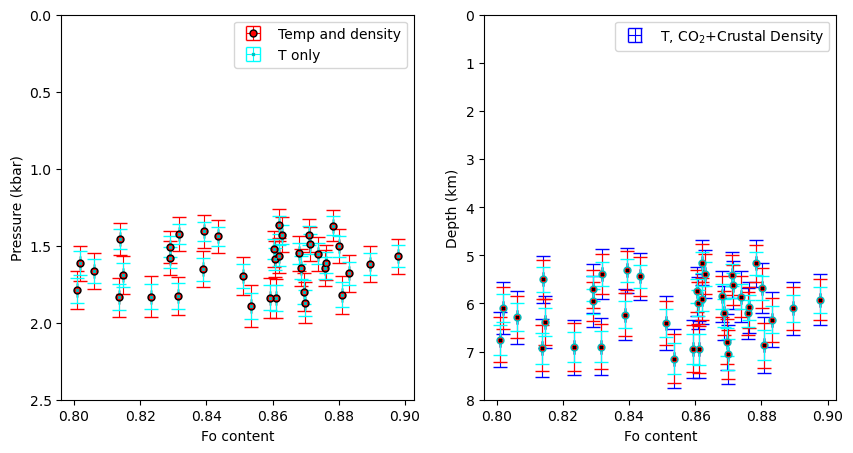

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T_CD['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T_CD['std_dev_MC_D_km'],
             fmt='o', ecolor='b', elinewidth=0.8, mfc='b', ms=0, mec='b', capsize=5,
            label='T, CO$_2$+Crustal Density')
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_P_kbar'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=5,
             label='Temp and density')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_D_km'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='c', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='c', capsize=5,
            label='T only')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')
ax2.legend()
ax1.legend()
ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()